<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 6) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[One-way ANOVA](#1way)**
    - 2.1 - **[Post-hoc Analysis](#post-hoc)**


<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="1way"></a>
# 2. One-way ANOVA

It is used to check the equality of population means for more than two independent samples. Each group is considered as a `treatment`. It assumes that the samples are taken from normally distributed populations. To check this assumption we can use the `Shapiro-Wilk Test.` Also, the population variances should be equal; this can be tested using the `Levene's Test`.

The null and alternative hypothesis is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The averages of all treatments are the same. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: At least one treatment has a different average. </strong></p>

Consider there are `t` treatments and `N` number of total observations. The test statistic is given as:
<p style='text-indent:28em'> <strong> $F = \frac{MTrSS}{MESS} $</strong></p>

Where,<br>
MTrSS = $\frac{TrSS}{df_{Tr}}$<br>

TrSS = $\sum_{i}^{t}\sum_{j}^{n_{i}}n_{i}(\bar{x_{i}}. - \bar{x}..)$<br> $n_{i}$ is the number of observations in $i^{th}$ treatment. <br>$\bar{x_{i}}.$ is the mean over $i^{th}$ treatment <br> $\bar{x}..$ is the grand mean (i.e. mean of all the observations). <br>

$df_{Tr}$ is the degrees of freedom for treatments (= $t-1$)

MESS = $\frac{ESS}{df_{e}}$<br>

ESS = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$

$df_{e}$ is the degrees of freedom for error (= $N-t$)

Under $H_{0}$, the test statistic follows F-distribution with ($t-1,  N-t$) degrees of freedom.

Let us calculate the F values for different levels of significance ($\alpha$).

In [3]:
# let us find the F-values for different alpha values with (10,10) degrees of freedom

# create an empty dataframe to store the alpha and corresponding F-value
df_F = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.25, 0.1, 0.05, 0.01] 

# use for loop to calculate the F-value for each alpha value
for i in range(len(alpha)):
    
    # use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha' to the parameter 'q'
    # pass the (10,10) degrees of freedom to the parameter 'dfn' and 'dfd' respectively
    # use 'round()' to round-off the value to 2 digits
    f_val = np.abs(round(stats.f.isf(q = alpha[i], dfn = 10, dfd = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding F-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "F": f_val}, index = [i])

    # append the row to the dataframe 'df_F'
    df_F = df_F.append(row)

# print the final dataframe
df_F

,alpha,F
0,0.25,1.55
1,0.10,2.32
2,0.05,2.98
3,0.01,4.85


### Example:

#### 1. Total marks in aptitude exam are recorded for students with different race/ethnicity. Test whether all the races/ethnicities have an equal average score with 0.05 level of significance. 

Use the performance dataset of students available in the CSV file `students_data.csv`.

In [4]:
# read the students performance data 
df_student = pd.read_csv('students_data.csv')

# display the first two observations
df_student.head(2)

,gender,ethnicity,education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,training_institute
0,female,group B,bachelor's degree,standard,none,89,55,56,200,Nature Learning
1,female,group C,college,standard,completed,55,63,72,190,Nature Learning


The null and alternative hypothesis is:

H<sub>0</sub>: The average score of all races/ethnicities is same<br>
H<sub>1</sub>: At least one race/ethnicity has a different average score

In [5]:
# unique race/ethnicity in the data
df_student['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

There are total 5 unique race/ethnicity in the dataset.

In [6]:
# given data
# total marks of students from group A
gr_A = df_student[df_student['ethnicity'] == 'group A']['total_score']

# total marks of students from group B
gr_B = df_student[df_student['ethnicity'] == 'group B']['total_score']

# total marks of students from group C
gr_C = df_student[df_student['ethnicity'] == 'group C']['total_score']

# total marks of students from group D
gr_D = df_student[df_student['ethnicity'] == 'group D']['total_score']

# total marks of students from group E
gr_E = df_student[df_student['ethnicity'] == 'group E']['total_score']

Plot the distribution for each group to compare the means.

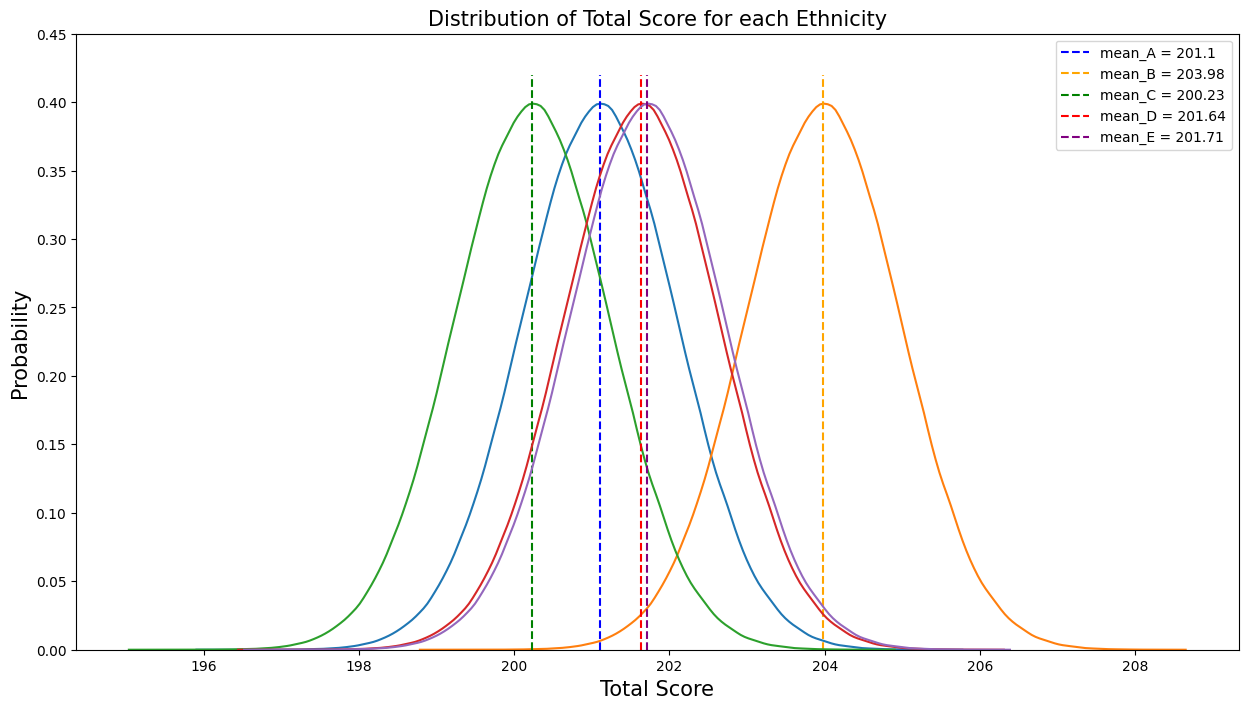

In [7]:
# consider a random variable 'X_A' that follows a normal distribution with mean score of group A 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_A = stats.norm.rvs(loc = gr_A.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_A, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_A.mean(), gr_A.mean()], [0, 0.42]
plt.plot(x, y, color = 'blue', linestyle = '--', label = 'mean_A = ' + str(round(gr_A.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_B' that follows a normal distribution with mean score of group B
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_B = stats.norm.rvs(loc = gr_B.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_B, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_B.mean(), gr_B.mean()], [0, 0.42]
plt.plot(x, y, color = 'orange', linestyle = '--', label = 'mean_B = ' + str(round(gr_B.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_C' that follows a normal distribution with mean score of group C
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_C = stats.norm.rvs(loc = gr_C.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_C, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_C.mean(), gr_C.mean()], [0, 0.42]
plt.plot(x, y, color = 'green', linestyle = '--', label = 'mean_C = ' + str(round(gr_C.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_D' that follows a normal distribution with mean score of group D
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_D = stats.norm.rvs(loc = gr_D.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_D, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_D.mean(), gr_D.mean()], [0, 0.42]
plt.plot(x, y, color = 'red', linestyle = '--', label = 'mean_D = ' + str(round(gr_D.mean(),2)))

# set the legend
plt.legend()

# consider a random variable 'X_E' that follows a normal distribution with mean score of group E
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_E = stats.norm.rvs(loc = gr_E.mean(), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_E, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [gr_E.mean(), gr_E.mean()], [0, 0.42]
plt.plot(x, y, color = 'purple', linestyle = '--', label = 'mean_E = ' + str(round(gr_E.mean(),2)))

# set the legend
plt.legend()

# set the limit for y-axis
plt.ylim(0, 0.45)

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Total Score', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Distribution of Total Score for each Ethnicity', fontsize = 15)

# display the plot
plt.show()

We can see that the sample means for each race/ethnicity are close to each other, which suggests that the null hypothesis is true (i.e. the average score of all ethnicities is same).

#### Perform ANOVA to test the equality of means.

Let us check the normality of the total marks of students from all the groups.

In [8]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total marks of students 
stat, p_value = stats.shapiro(df_student['total_score'])

# print the p-value
print('p-value:', p_value)

p-value: 0.7399389743804932


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the total marks of students from each group are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [9]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the total scores of students from each group
stat, p_value = stats.levene(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.12649444001357793


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

In [10]:
# obtain number of unique ethnicities
t = df_student['ethnicity'].nunique()
print('t:', t)

# calculate the number of students in each ethnicity
# consider the total number of students in all ethnicities
N = df_student['ethnicity'].value_counts().sum()
print('N:', N)

t: 5
N: 1000


For ⍺ = 0.05 and degrees of freedom (= t-1, N-t) = (4, 995), calculate the critical value.

In [11]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 4, dfd = 995), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.3809


i.e. if the test statistic value is greater than 2.3809 then we reject the null hypothesis.

In [12]:
# perform one-way ANOVA
# pass the given data
f_test, p_val = stats.f_oneway(gr_A, gr_B, gr_C, gr_D, gr_E)

# print the test statistic and corresponding p-value
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 0.789109595922189
p-value: 0.5322937031083035


We can also use the `anova_lm()` in statsmodels library to perform ANOVA.

In [13]:
# perform one-way ANOVA

# fit an ols model on the datafreme 'df_student' 
# use 'Q()' to quote the variable name 
# use 'fit()' to fit the linear model
test = ols('total_score ~ Q("ethnicity")', df_student).fit()

# create table for one-way ANOVA test
# pass the linear model 'test'
# 'typ = 1' performs two-way ANOVA
anova_1 = anova_lm(test, typ = 1)

# print the table
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""ethnicity"")",4.0,1699.671655,424.917914,0.78911,0.532294
Residual,995.0,535785.303345,538.477692,NaN,NaN


The above output shows that the test statistic is less than 2.3809 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and conclude that the average score of all races/ethnicities is the same.

Let us plot the acceptance and rejection region for a test with 95% confidence.

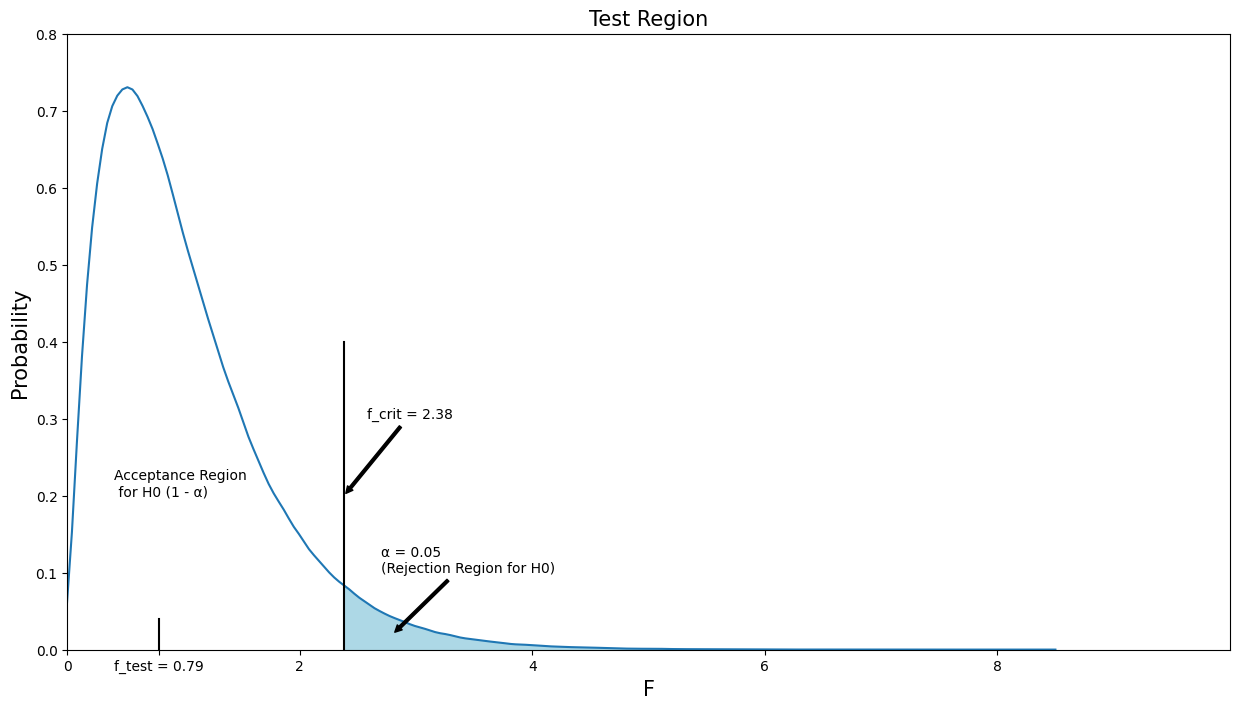

In [14]:
# consider a random variable 'X' that follows a F distribution 
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.f.rvs(dfn = 4, dfd = 995, size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.8)

# set the limit for x-axis
plt.xlim(0, 10)

# use 'stats.f.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom (= 4) to the parameter 'dfn' 
# pass the degrees of freedom (= 995) to the parameter 'dfd' 
f = stats.f.isf(q = 0.05, dfn = 4, dfd = 995)

# plot a vertical line at f-value
x, y = [f, f], [0, 0.4]
plt.plot(x, y, color = 'black')

# plot a vertical line at f test value
x, y = [f_test, f_test], [0, 0.04]
plt.plot(x, y, color = 'black')

# add the color to the right of the f-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical f-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= f], y1[x1 >= f], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'α = 0.05\n(Rejection Region for H0)', xy = (2.8, 0.02), xytext = (2.7, 0.1), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'f_crit = '+ str(round(f,2)), xy = (f, 0.2), xytext = (f+0.2, 0.3), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.4, y = 0.2, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 2, 4, 6, 8, round(f_test,2)], 
           labels = [0, 2, 4, 6, 8, 'f_test = '+str(round(f_test,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('F', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, which implies that we fail to reject (i.e. accept) $H_{0}$.

#### 2. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Test at 5% level of significance.

<img src='1_ANOVA.png'>

The null and alternative hypothesis is:

H<sub>0</sub>: The average tensile strength due to all the machines is the same<br>
H<sub>1</sub>: The average tensile strength due to at least one machines is different

In [15]:
# given data
# tensile strength due to machine A
A = [68.7, 75.4, 70.9, 79.1, 78.2]

# tensile strength due to machine B
B = [62.7, 68.5, 63.1, 62.2, 60.3]

# tensile strength due to machine C
C = [55.9, 56.1, 57.3, 59.2, 50.1]

# tensile strength due to machine D
D = [80.7, 70.3, 80.9, 85.4, 82.3]

Plot the distribution for each group to compare the means.

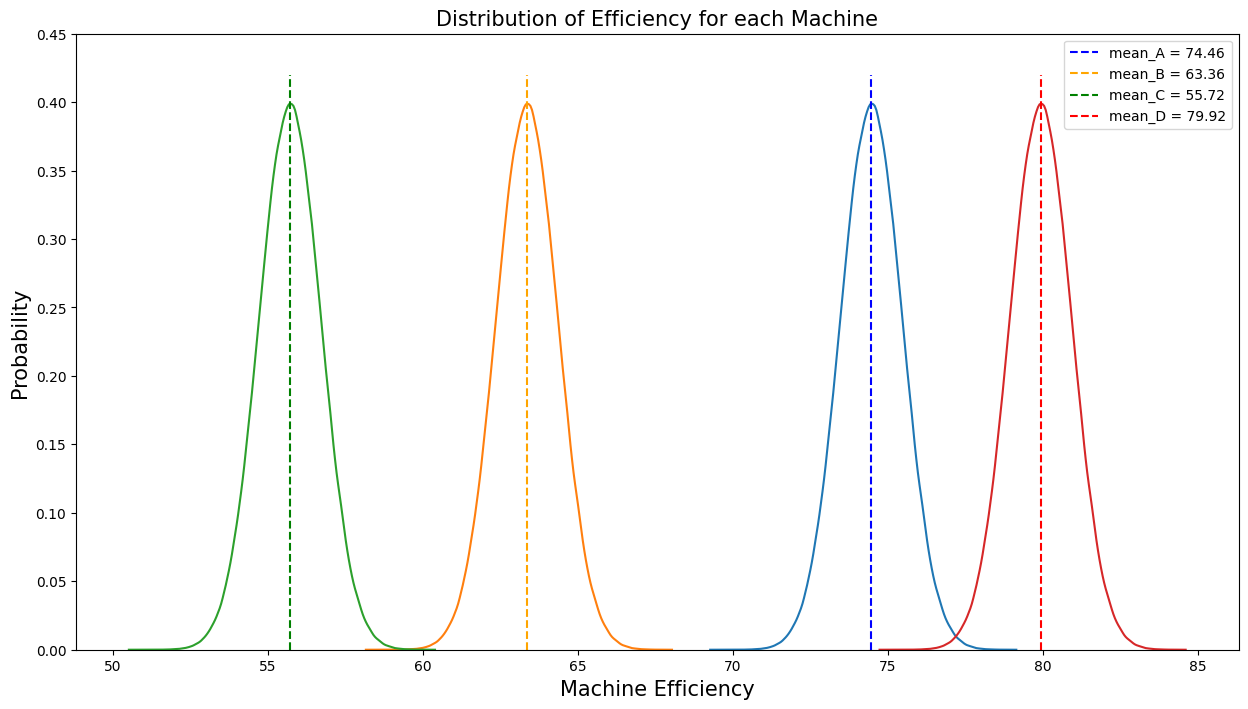

In [16]:
# consider a random variable 'X_A' that follows a normal distribution with mean efficiency of machine A 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_A = stats.norm.rvs(loc = np.mean(A), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_A, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(A), np.mean(A)], [0, 0.42]
plt.plot(x, y, color = 'blue', linestyle = '--', label = 'mean_A = ' + str(round(np.mean(A),2)))

# set the legend
plt.legend()

# consider a random variable 'X_B' that follows a normal distribution with mean efficiency of machine B
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_B = stats.norm.rvs(loc = np.mean(B), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_B, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(B), np.mean(B)], [0, 0.42]
plt.plot(x, y, color = 'orange', linestyle = '--', label = 'mean_B = ' + str(round(np.mean(B),2)))

# set the legend
plt.legend()

# consider a random variable 'X_C' that follows a normal distribution with mean efficiency of machine C
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_C = stats.norm.rvs(loc = np.mean(C), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_C, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(C), np.mean(C)], [0, 0.42]
plt.plot(x, y, color = 'green', linestyle = '--', label = 'mean_C = ' + str(round(np.mean(C),2)))

# set the legend
plt.legend()

# consider a random variable 'X_D' that follows a normal distribution with mean efficiency of machine D
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X_D = stats.norm.rvs(loc = np.mean(D), size = 1000000, random_state = 15)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
sns.distplot(a = X_D, hist = False, kde_kws = dict(cumulative=False))

# plot a vertical line at mean value
x, y = [np.mean(D), np.mean(D)], [0, 0.42]
plt.plot(x, y, color = 'red', linestyle = '--', label = 'mean_D = ' + str(round(np.mean(D),2)))

# set the legend
plt.legend()

# set the limit for y-axis
plt.ylim(0, 0.45)

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Machine Efficiency', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Distribution of Efficiency for each Machine', fontsize = 15)

# display the plot
plt.show()

We can see that the sample means for each machine are not significantly close to each other, which suggests that the null hypothesis is not true (i.e. the average efficiency of at least one machine is different).

#### Perform ANOVA to test the equality of means.

Let us check the normality of the tensile strength of all the machines.

In [17]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [18]:
# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths due to each machine
stat, p_value = stats.shapiro(df_machine['strength'])

# print the p-values for each group
print('p-value:', p_value)

p-value: 0.3721875548362732


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the tensile strengths due to all the machines are normally distributed. Thus the assumption of normality is satisfied.

Let us check the equality of variances.

In [19]:
# perform Levene's test for the equality of variances 
# levene() returns a tuple having the values of test statistics and the corresponding p-value
# pass the tensile strengths of each machine
stat, p_value = stats.levene(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                             df_machine[df_machine['machine'] == 'machine_B']['strength'],
                             df_machine[df_machine['machine'] == 'machine_C']['strength'],
                             df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the p-value 
print('P-Value:', p_value)

P-Value: 0.7570021212992085


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples.

Here t (=number of machines) = 4, N (=total observations) = 20 

For ⍺ = 0.05 and degrees of freedom = (t-1, N-t) = (3, 16), calculate the critical value.

In [20]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# pass the degrees of freedom (= 3) to the parameter 'dfn' 
# pass the degrees of freedom (= 16) to the parameter 'dfd' 
# use 'round()' to round-off the value to 4 digits
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 3, dfd = 16), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 3.2389


i.e. if the test statistic value is greater than 3.2389 then we reject the null hypothesis.

In [21]:
# perform one-way ANOVA
# pass the given data
test_stat, p_val = stats.f_oneway(df_machine[df_machine['machine'] == 'machine_A']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_B']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_C']['strength'],
                                  df_machine[df_machine['machine'] == 'machine_D']['strength'])

# print the test statistic and p-value
print('Test statistic:', test_stat)
print('p_value:', p_val)

Test statistic: 32.03072350199285
p_value: 5.375613532781072e-07


The above output shows that the test statistic is greater than 3.2389 and the p-value is less than 0.05. Thus we reject the null hypothesis and conclude that the average tensile strength due to at least one machine is different.

<a id="post-hoc"></a>
## 2.1 Post-hoc Analysis

If one-way ANOVA rejects the null hypothesis; we conclude that at least one treatment has a different mean. The test does not distinguish a treatment with the different average value. The post-hoc test or `multi comparison test` is used to identify such treatment(s).

In this section, we study the `Tukey's HSD` test. The test calculates the mean difference for each pair of treatments and returns the pair(s) with different average. 

The test statistic of Tukey's HSD test is given as:
<p style='text-indent:28em'> <strong> $T_{\alpha} = q_{{\alpha},(t , f)} \sqrt{\frac{MSE}{n}} $</strong></p>

The value of $q_{{\alpha},(t , f)}$ is obtained from the tukey table.<br>
Where,<br>
t: Number of treatments<br>
f: degrees of freedom for error ($df_{e}$)<br>
MSE: Mean error sum of squares (= $\frac{ESS}{df_{e}}$ = $\sum_{i}^{t}\sum_{j}^{n_{i}}{(x_{ij} - \bar{x_{i}}.)}^{2}$)<br>
n: Number of observations in a treatment

This test is efficient when the sample size for each treatment is equal. If the sample size is not equal fo each treatment then we can use the `Scheffe test`. The `scikit_posthocs.posthoc_scheffe()` can be used to perform the test.

### Example:

#### 1. Ryan is a production manager at an industry manufacturing alloy seals. They have 4 machines - A, B, C and D. Ryan wants to study whether all the machines have equal efficiency. Ryan collects data of tensile strength from all the 4 machines as given. Perform the post-hoc test to find out which machine has a different average. Test at 5% level of significance.

<img src='1_ANOVA.png'>

In [22]:
# create a dataframe using a dictionary from given data
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [23]:
# perform tukey's range test to compare the mean efficiency for pair of machines
# pass the tensile strength to the parameter, 'data'
# pass the name of the machine to the parameter, 'groups'
comp = mc.MultiComparison(data = df_machine['strength'], groups = df_machine['machine'])

# tukey's range test
post_hoc = comp.tukeyhsd()

# print the summary table
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8836,-3.3164,True
machine_A,machine_C,-18.74,0.0,-26.5236,-10.9564,True
machine_A,machine_D,5.46,0.2264,-2.3236,13.2436,False
machine_B,machine_C,-7.64,0.0553,-15.4236,0.1436,False
machine_B,machine_D,16.56,0.0001,8.7764,24.3436,True
machine_C,machine_D,24.2,0.0,16.4164,31.9836,True


The `reject=False` for pairs (machine_A, machine_D) and (machine_B, machine_C) denotes that we fail to reject the null hypothesis; and conclude that the average tensile strength due to machine_A and machine_D, machine_B and machine_C is same.

For the pairs (machine_A, machine_B), (machine_A, machine_C), (machine_B, machine_D), and (machine_C, machine_D) the average tensile strength is not the same.

The values in the columns `lower` and `upper` represent the lower and upper bound of the 95% confidence interval for the mean difference. 